# Target circulation patterns for each hotspot region and pattern occurrence under various forcings

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cmaps
import cartopy
from scipy.stats import pearsonr
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import seaborn as sns

import cartopy.crs as ccrs
mapcrs = ccrs.PlateCarree(central_longitude=0, globe=None)

In [2]:
domain_lonlat = {
    'EAS':{'lon_min':90,'lon_max':130,'lat_min':30,'lat_max':60},
    'EU':{'lon_min':10,'lon_max':50,'lat_min':35,'lat_max':65},
    'WNA':{'lon_min':220,'lon_max':260,'lat_min':25,'lat_max':55},
}
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/figure_res/'

## draw 4*1 SOM grid for 3 reanalysis

In [3]:
## decide the SOM pattern pairs among three reanalyses, refer to era5
def patt_pair(domain):
    som_pattern_wb = pd.read_excel('/Users/zeqinhuang/Documents/paper/HWdna/procData/som_pattern_grid_4-1_historical_'+domain+'.xlsx',index_col=0,sheet_name=None)
    cls_refer_era5 = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_era5_corr = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())

    for d in som_pattern_wb.keys():
        som_pattern_dataset = som_pattern_wb[d]
        for c in som_pattern_dataset.columns:
            patt_corr_with_era5_0 = som_pattern_wb['era5']['grid:0-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_1 = som_pattern_wb['era5']['grid:1-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_2 = som_pattern_wb['era5']['grid:2-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_3 = som_pattern_wb['era5']['grid:3-0'].corr(som_pattern_dataset[c])
            if max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_0:
                cls_refer_era5.loc[d][c] = 0
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_0
            elif max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_1:
                cls_refer_era5.loc[d][c] = 1
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_1
            elif max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_2:
                cls_refer_era5.loc[d][c] = 2
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_2
            else:
                cls_refer_era5.loc[d][c] = 3
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_3

    som_pattern_reanalyses = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'])
    for c in range(len(som_pattern_reanalyses.columns)):
        pair_col_era5 = cls_refer_era5.columns[(cls_refer_era5.loc['era5']==c)][0]
        pair_col_ncep2 = cls_refer_era5.columns[(cls_refer_era5.loc['ncep2']==c)][0]
        pair_col_jra55 = cls_refer_era5.columns[(cls_refer_era5.loc['jra55']==c)][0]
        som_pattern_reanalyses.iloc[:,c] = (som_pattern_wb['era5'][pair_col_era5] + som_pattern_wb['ncep2'][pair_col_ncep2] + som_pattern_wb['jra55'][pair_col_jra55]) / 3

    ## update pattern correlation with reanalyses average instead of era5
    cls_refer_re = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_re_corr = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_re_corr_sig = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())

    for d in som_pattern_wb.keys():
        som_pattern_dataset = som_pattern_wb[d]
        for c in som_pattern_dataset.columns:
            patt_corr_with_re_0, patt_sig_with_re_0 = pearsonr(som_pattern_reanalyses['grid:0-0'],som_pattern_dataset[c])
            patt_corr_with_re_1, patt_sig_with_re_1 = pearsonr(som_pattern_reanalyses['grid:1-0'],som_pattern_dataset[c])
            patt_corr_with_re_2, patt_sig_with_re_2 = pearsonr(som_pattern_reanalyses['grid:2-0'],som_pattern_dataset[c])
            patt_corr_with_re_3, patt_sig_with_re_3 = pearsonr(som_pattern_reanalyses['grid:3-0'],som_pattern_dataset[c])
            if max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_0:
                cls_refer_re.loc[d][c] = 0
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_0
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_0
            elif max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_1:
                cls_refer_re.loc[d][c] = 1
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_1
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_1
            elif max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_2:
                cls_refer_re.loc[d][c] = 2
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_2
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_2
            else:
                cls_refer_re.loc[d][c] = 3
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_3
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_3

    return som_pattern_reanalyses,cls_refer_re, cls_refer_re_corr,cls_refer_re_corr_sig

In [4]:
regions = ['EU','EAS','WNA']
patt_clss = pd.DataFrame(columns=['forcing','domain','data_run','data_name','pattern','count_percent'])
def patt_clss_wide2long(domain,forcing):
    r = domain
    if forcing == 'historical':
        patt_winners = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_relative_to_reanalyses_mean_historical_' + r + '.csv',index_col=0)
    else:
        patt_winners = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_forings_relative_to_reanalyses_mean_' + forcing + '_' + r + '.csv',index_col=0)
    patt_winners_clss_1 = patt_winners.apply(lambda x: sum(x==0),axis=0)
    patt_winners_clss_2 = patt_winners.apply(lambda x: sum(x==1),axis=0)
    patt_winners_clss_3 = patt_winners.apply(lambda x: sum(x==2),axis=0)
    patt_winners_clss_4 = patt_winners.apply(lambda x: sum(x==3),axis=0)
    patt_winners_clss = pd.concat([patt_winners_clss_1,patt_winners_clss_2,patt_winners_clss_3,patt_winners_clss_4],axis=1)
    patt_winners_clss.columns = ['Pattern 1','Pattern 2','Pattern 3','Pattern 4']
    return patt_winners_clss

i = 0
for f in ['historical','hist-GHG','hist-aer','hist-nat','ssp585']:
    for r in regions:
        patt_winners_clss = patt_clss_wide2long(r,f)
        for dr in patt_winners_clss.index:
            data_name = dr.split('_')[0]
            for p in ['Pattern 1','Pattern 2','Pattern 3','Pattern 4']:
                count_percent = patt_winners_clss.loc[dr][p] / sum(patt_winners_clss.loc[dr]) * 100
                cursor = pd.DataFrame([[f,r,dr,data_name,p,count_percent]],columns=['forcing','domain','data_run','data_name','pattern','count_percent'],index=[i])
                patt_clss = patt_clss.append(cursor)
                i += 1

patt_clss_reanalysis = patt_clss[patt_clss['data_name'].isin(['era5','ncep2','jra55'])]
patt_clss_era5 = patt_clss[patt_clss['data_name'].isin(['era5'])]
patt_clss_ncep2 = patt_clss[patt_clss['data_name'].isin(['ncep2'])]
patt_clss_jra55 = patt_clss[patt_clss['data_name'].isin(['jra55'])]
patt_clss_cmip6 = patt_clss[~patt_clss['data_name'].isin(['era5','ncep2','jra55'])]
patt_clss_cmip6_1 = patt_clss_cmip6[patt_clss_cmip6['data_name']=='CanESM5']
patt_clss_cmip6_2 = patt_clss_cmip6[patt_clss_cmip6['data_name']=='HadGEM3-GC31-LL']
patt_clss_cmip6_3 = patt_clss_cmip6[patt_clss_cmip6['data_name']=='MIROC6']
patt_clss_cmip6_4 = patt_clss_cmip6[patt_clss_cmip6['data_name']=='IPSL-CM6A-LR']
patt_clss_cmip6_5 = patt_clss_cmip6[patt_clss_cmip6['data_name']=='MRI-ESM2-0']

<ipython-input-8-7125aaeeb757>:165: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})
<ipython-input-8-7125aaeeb757>:165: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})
<ipython-input-8-7125aaeeb757>:165: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})


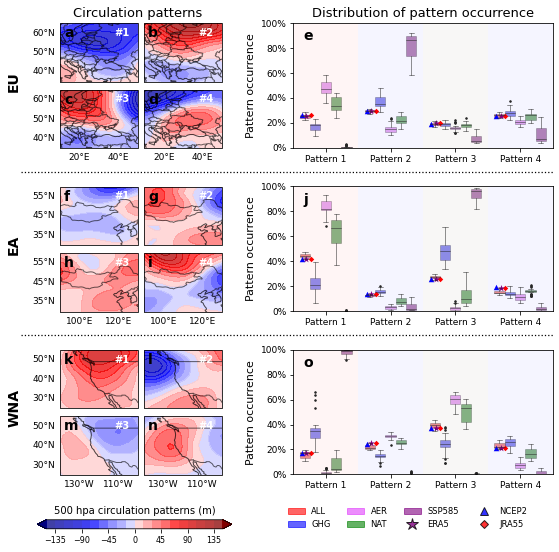

In [8]:
fig = plt.figure(figsize = (9, 8.4))
n_grid = 4 # 4 grids
m_region = 3 # 3 region
regions = ['EU','EAS','WNA']
levels = [-150 + 15 * i for i in range(21)]
cmap1 = cmaps.BlRe

def add_panel_label(ax, label, x = -0.1, y = 1.15):
    ax.text(x, y, label, transform=ax.transAxes,
      fontsize=14, fontweight='bold', va='top', ha='left')

ax_anchor = [
    [0.16,0.80,0.12,0.115],
    [0.29,0.80,0.12,0.115],
    [0.16,0.69,0.12,0.115],
    [0.29,0.69,0.12,0.115],
    
    [0.16,0.53,0.12,0.115],
    [0.29,0.53,0.12,0.115],
    [0.16,0.42,0.12,0.115],
    [0.29,0.42,0.12,0.115],

    [0.16,0.26,0.12,0.115],
    [0.29,0.26,0.12,0.115],
    [0.16,0.15,0.12,0.115],
    [0.29,0.15,0.12,0.115],
]

abc_label = ['a','b','c','d','f','g','h','i','k','l','m','n']
patt_label = ['#1','#2','#3','#4','#1','#2','#3','#4','#1','#2','#3','#4']

for m in range(m_region):
    domain = regions[m]
    som_pattern_reanalyses,cls_refer_re,cls_refer_re_corr,cls_refer_re_corr_sig = patt_pair(domain)
    lon = np.arange(domain_lonlat[domain]['lon_min'],domain_lonlat[domain]['lon_max']+1,1)
    lat = np.arange(domain_lonlat[domain]['lat_min'],domain_lonlat[domain]['lat_max']+1,1)
    for n in range(n_grid):
        ax = fig.add_axes(ax_anchor[m*4+n], projection = mapcrs)
        dat_n_era5 = cls_refer_re.columns[cls_refer_re.loc['era5']==n][0]
        dat_n_ncep2 = cls_refer_re.columns[cls_refer_re.loc['ncep2']==n][0]
        dat_n_jra55 = cls_refer_re.columns[cls_refer_re.loc['jra55']==n][0]
        som_mn_flatten =  som_pattern_reanalyses.iloc[:,n]
        som_mn_corr_era5 = cls_refer_re_corr.loc['era5'][dat_n_era5]
        som_mn_corr_sig_era5 = cls_refer_re_corr_sig.loc['era5'][dat_n_era5]
        som_mn_corr_ncep2 = cls_refer_re_corr.loc['ncep2'][dat_n_ncep2]
        som_mn_corr_sig_ncep2 = cls_refer_re_corr_sig.loc['ncep2'][dat_n_ncep2]
        som_mn_corr_jra55 = cls_refer_re_corr.loc['jra55'][dat_n_jra55]
        som_mn_corr_sig_jra55 = cls_refer_re_corr_sig.loc['jra55'][dat_n_jra55]
        som_mn = np.reshape(som_mn_flatten.to_list(),newshape=(len(lat),len(lon)),order='F')
        
        p1 = ax.contourf(lon,lat,som_mn,levels = levels, alpha=0.75, extend = 'both',cmap=cmap1)
        ax.text(0.7,0.75,s=patt_label[m*4+n],horizontalalignment='left',verticalalignment='bottom',transform = ax.transAxes,fontweight='bold',fontsize=10,color='white')

        resol = '110m'  # use data at this scale
        bodr = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
        land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale=resol, edgecolor='k', facecolor='none', alpha=0.7)
        ax.add_feature(land, facecolor='none')
        ax.add_feature(bodr, linestyle='-', edgecolor='k', alpha=0.6)
        add_panel_label(ax, abc_label[m*4+n], x = 0.05, y = 0.95)

        gl = ax.gridlines(draw_labels=True,)
        gl.top_labels = False
        gl.right_labels = False
        if n in [1,3]:
            gl.left_labels = False
        if n in [0,1]:
            gl.bottom_labels = False
        if m == 0:
            gl.xlocator = mticker.FixedLocator([20, 40])
            gl.ylocator = mticker.FixedLocator([40, 50, 60])
        elif m == 1:
            gl.xlocator = mticker.FixedLocator([100, 120])
            gl.ylocator = mticker.FixedLocator([35, 45, 55])
        else:
            gl.xlocator = mticker.FixedLocator([-130,-110])
            gl.ylocator = mticker.FixedLocator([30, 40, 50])
        gl.xlabel_style = {'size': 9}
        gl.ylabel_style = {'size': 9}
        gl.xlines = False
        gl.ylines = False
        if n == 0:
            if m == 0:
                ax.text(-0.5, 0, 'EU', va='bottom', ha='center',fontsize=14, fontweight='bold',
                        rotation='vertical', rotation_mode='anchor',
                        transform=ax.transAxes)
            elif m == 1:
                ax.text(-0.5, 0, 'EA', va='bottom', ha='center',fontsize=14, fontweight='bold',
                        rotation='vertical', rotation_mode='anchor',
                        transform=ax.transAxes)
            else:
                ax.text(-0.5, 0, 'WNA', va='bottom', ha='center',fontsize=14, fontweight='bold',
                        rotation='vertical', rotation_mode='anchor',
                        transform=ax.transAxes)
        if m == 0 and n == 0:
            ax.text(1,1.05,s='Circulation patterns',horizontalalignment='center',verticalalignment='bottom',transform = ax.transAxes,fontweight='medium',fontsize=13)

cbar_ax = fig.add_axes([0.125, 0.07, 0.3, 0.015])
fig_cbar = fig.colorbar(p1, cax=cbar_ax, orientation ='horizontal')
fig_cbar.ax.tick_params(labelsize=8)
fig_cbar.ax.set_title('500 hpa circulation patterns (m)', fontdict={'fontsize': 10, 'fontweight': 'medium'})

ax_anchor2 = [
    [0.52,0.7,0.4,0.206],
    [0.52,0.43,0.4,0.206],
    [0.52,0.16,0.4,0.206]
]

colors0 = ['red','blue','#E040FB','green','purple']
sns.set_palette(sns.color_palette(colors0))

for i in range(3):
    ax = fig.add_axes(ax_anchor2[i])
    ax1 = sns.boxplot(
        x='pattern',y='count_percent',hue='forcing',dodge=True,flierprops = dict(marker='o', markersize=1.5),boxprops=dict(alpha=.5),
        data=patt_clss_cmip6[patt_clss_cmip6['domain']==regions[i]],order=['Pattern 1','Pattern 2','Pattern 3','Pattern 4'],
        hue_order=['historical','hist-GHG','hist-aer','hist-nat','ssp585'],#palette="pastel",
        width=0.8,linewidth=0.5,ax = ax) 
    ax1.bar([0,1,2,3],[100,100,100,100],width=[1],color=['red','blue','#4E342E','blue'],alpha=0.04)
    ax1.set(ylim=(0,100))
    ax1.set(xlim=(-0.5, 3.5))
    
    sns.scatterplot(
        data=patt_clss_ncep2[patt_clss_ncep2['domain']==regions[i]],linewidth=0,
        x=[-0.37,0.63,1.63,2.63],y='count_percent',marker='^',s=30,ax=ax,color='blue')
    sns.scatterplot(
        data=patt_clss_jra55[patt_clss_jra55['domain']==regions[i]],linewidth=0,
        x=[-0.23,0.77,1.77,2.77],y='count_percent',marker='D',s=15,ax=ax,color='red')
    sns.scatterplot(
        data=patt_clss_era5[patt_clss_era5['domain']==regions[i]],linewidth=0,
        x=[-0.3,0.7,1.7,2.7],y='count_percent',marker='*',s=50,ax=ax,color='purple')

    ax1.set_ylabel('Pattern occurrence',fontdict={'fontsize':11})
    yticklabels = ax1.get_yticklabels()
    ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    add_panel_label(ax1, ['e','j','o'][i], x = 0.04, y = 0.95)
    if i == 0:
        ax1.set_title('Distribution of pattern occurrence',fontdict={'fontsize':13,'fontweight': 'medium'})
    xticklabels = ax1.get_xticklabels()
    ax1.set_xticklabels(xticklabels,fontdict={'fontsize':9})
    ax1.xaxis.label.set_visible(False)
    ax1.get_legend().remove()

# handles, labels = ax1.get_legend_handles_labels()
labels = ['ALL','GHG','AER','NAT','SSP585','ERA5','NCEP2','JRA55'] 
legend_elements = [
    Patch(facecolor='red', edgecolor='red',label='ALL',alpha=0.6),
    Patch(facecolor='blue', edgecolor='blue',label='GHG',alpha=0.6),
    Patch(facecolor='#E040FB', edgecolor='#E040FB',label='AER',alpha=0.6),
    Patch(facecolor='green', edgecolor='green',label='NAT',alpha=0.6),
    Patch(facecolor='purple', edgecolor='purple',label='SSP585',alpha=0.6),
    Line2D([0], [0], marker='*' ,color='none',markerfacecolor='purple', label='ERA5',alpha=0.8,markersize=12),
    Line2D([0], [0], marker='^' ,color='none',markerfacecolor='blue', label='NCEP2',alpha=0.8,markersize=8),
    Line2D([0], [0], marker='D' ,color='none',markerfacecolor='red', label='JRA55',alpha=0.8,markersize=6),]
handles = legend_elements
ax1.legend(handles,labels,frameon=False,ncol=4,loc=2,bbox_to_anchor=[-0.05,-0.2],fontsize = 'small', fancybox = False) #,titile='Forcing'

line1 = plt.Line2D((.1,0.92),(.66,0.66), color="k", linewidth=1.25, linestyle=':')
line2 = plt.Line2D((.1,0.92),(.39,0.39), color="k", linewidth=1.25, linestyle=':')
fig.add_artist(line1) ## add separate line
fig.add_artist(line2) ## add separate line

fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/HWdna_figure_res/'
fig.savefig(fig_dir+'Fig2_distribution_patt_occur_external_forcing.pdf')
